# Simple Linear Regression

## Importing the libraries

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [128]:
df = pd.read_csv('Salary_Data.csv')
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values


In [129]:
def reshapeAndAppend1s (faces):
    shapes = faces.shape
    N = shapes[0]
    M = shapes[1]
    oneMat = np.ones(N)
    newFaces = faces.reshape(N,(M ** 2))
    newFaces = np.transpose(newFaces)
    finalMat = np.vstack((newFaces,oneMat))
    return finalMat

## Splitting the dataset into the Training set and Test set

In [130]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

x_train2 = reshapeAndAppend1s(x_train)
x_test2 = reshapeAndAppend1s(x_test)
print(x_train.shape)
print(x_train2.shape)

print(x_train)
print(x_train2)

(24, 1)
(2, 24)
[[ 9.6]
 [ 4. ]
 [ 5.3]
 [ 7.9]
 [ 2.9]
 [ 5.1]
 [ 3.2]
 [ 4.5]
 [ 8.2]
 [ 6.8]
 [ 1.3]
 [10.5]
 [ 3. ]
 [ 2.2]
 [ 5.9]
 [ 6. ]
 [ 3.7]
 [ 3.2]
 [ 9. ]
 [ 2. ]
 [ 1.1]
 [ 7.1]
 [ 4.9]
 [ 4. ]]
[[ 9.6  4.   5.3  7.9  2.9  5.1  3.2  4.5  8.2  6.8  1.3 10.5  3.   2.2
   5.9  6.   3.7  3.2  9.   2.   1.1  7.1  4.9  4. ]
 [ 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   1.   1.   1.   1.   1.   1.   1.   1.   1. ]]


## Training the Simple Linear Regression model on the Training set

In [131]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

## Predicting the Test set results

In [132]:
yhat = regression.predict(x_test)
w = np.linalg.solve(x_train2.dot(x_train2.T),x_train2.dot(y_train))
yhat2 = x_test2.T.dot(w)

print(yhat)
print(yhat2)

[ 40748.96184072 122699.62295594  64961.65717022  63099.14214487
 115249.56285456 107799.50275317]
[ 40748.96184072 122699.62295594  64961.65717022  63099.14214487
 115249.56285456 107799.50275317]


In [133]:
def fMSe(yhat,y):
    return (1/(2*len(y))) * np.sum((y-yhat)**2)

def gradfMSE (wtilde, Xtilde, y, alpha = 0.):
    n = len(y)
    alphaPart = (alpha/(2*n))*(wtilde + wtilde.T)
    return 1/n * (Xtilde.dot(Xtilde.T.dot(wtilde)-y) + alphaPart)

def gradDes(x,y,alpha=0.):
    ep = 3e-3
    T = 5000
    lenOfW = len(x)
    w = .01 * np.random.randn(lenOfW)

    for i in range(T):
        w = w - ep * gradfMSE(w,x,y,.001)
    return w
    

w2 = gradDes(x_train2,y_train)
yhat3 = x_test2.T.dot(w2)
yhatG = x_train2.T.dot(w2)

print(yhat3)

print(y_test)

print(fMSe(yhat2,y_test))
print(fMSe(yhat3,y_test))

[ 39836.48720071 123447.08831152  64539.61934709  62639.37841275
 115846.12457417 108245.16083683]
[ 37731. 122391.  57081.  63218. 116969. 109431.]
6411706.149063319
5348439.0102413


## Visualising the Training set results

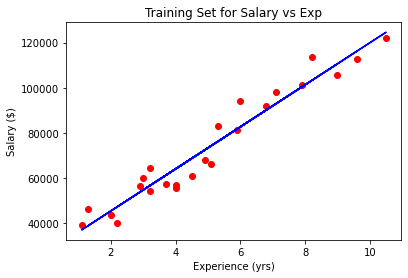

In [134]:
plt.scatter(x_train,y_train,color = "red")
plt.plot(x_train,regression.predict(x_train),color="blue")
plt.title("Training Set for Salary vs Exp")
plt.xlabel("Experience (yrs)")
plt.ylabel("Salary ($)")
plt.show()


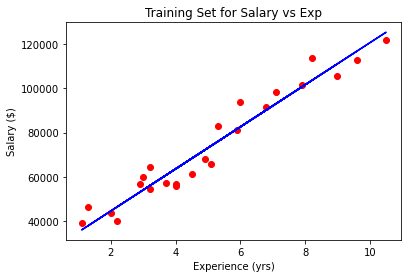

In [135]:
plt.scatter(x_train,y_train,color = "red")
plt.plot(x_train,yhatG,color="blue")
plt.title("Training Set for Salary vs Exp")
plt.xlabel("Experience (yrs)")
plt.ylabel("Salary ($)")
plt.show()

## Visualising the Test set results

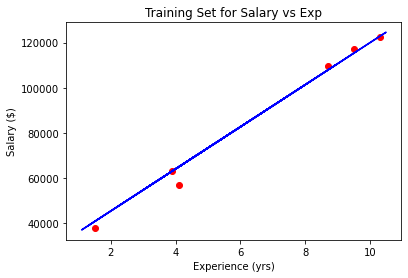

In [136]:
plt.scatter(x_test,y_test,color = "red")
plt.plot(x_train,regression.predict(x_train),color="blue")
plt.title("Training Set for Salary vs Exp")
plt.xlabel("Experience (yrs)")
plt.ylabel("Salary ($)")
plt.show()